## Importing the required libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\Asus\Anaconda3\envs\Mental\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\Anaconda3\envs\Mental\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\Anaconda3\envs\Mental\lib\site-packages\tensorflow\python\framework\dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\Anaconda3\envs\Mental\lib\site-packages\tensorflow\python\f

In [2]:
from keras import regularizers

In [3]:
import os

In [4]:
mylist= os.listdir('C:/Users/Asus/Desktop/sound/ravdess/')

In [5]:
type(mylist)

list

In [6]:
print(mylist)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-

In [7]:
print(mylist[6:-16])

['03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-12.wav', '03-01-01-01-01-02-13.wav', '03-01-01-01-01-02-14.wav', '03-01-01-01-01-02-15.wav', '03-01-01-01-01-02-16.wav', '03-01-01-01-01-02-17.wav', '03-01-01-01-01-02-

## Plotting the audio file's waveform and its spectrogram

In [8]:
data, sampling_rate = librosa.load('C:/Users/Asus/Desktop/sound/ravdess/03-01-02-01-02-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


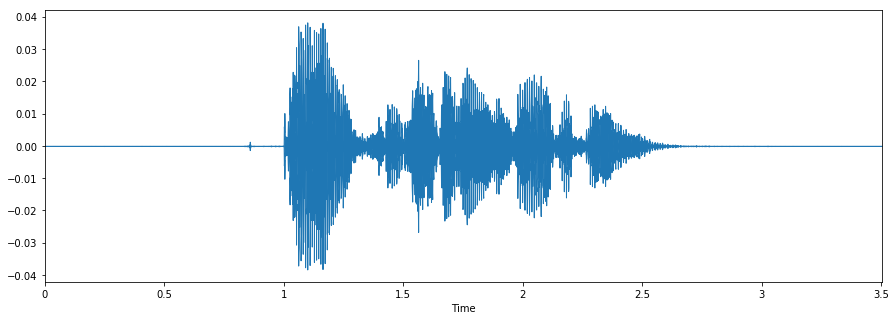

In [9]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

C:\Users\Asus\Anaconda3\envs\Mental\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
C:\Users\Asus\Anaconda3\envs\Mental\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


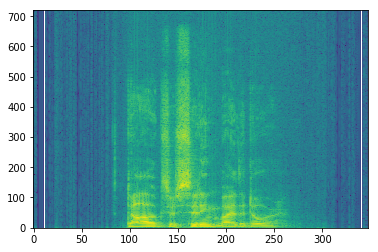

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('C:/Users/Asus/Desktop/sound/ravdess/03-01-02-01-02-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [ ]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [ ]:
labels = pd.DataFrame(feeling_list)

In [ ]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


## Getting the features of audio files using librosa

In [11]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('C:/Users/Asus/Desktop/sound/ravdess/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [15]:
df[:5]

,feature
0,"[-70.26777, -70.26777, -70.26777, -70.26777, -..."
1,"[-65.70765, -65.70765, -63.11472, -61.518997, ..."
2,"[-65.4825, -65.4825, -65.4825, -65.4825, -65.4..."
3,"[-64.52845, -64.52845, -64.52845, -64.52845, -..."
4,"[-62.36431, -59.93473, -61.869602, -67.495766,..."


In [16]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [17]:
newdf = pd.concat([df3,labels], axis=1)

NameError: name 'labels' is not defined

In [85]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [86]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,...,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,...,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,...,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,...,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,...,-39.071328,-41.897121,-40.865430,-38.290605,-36.372397,-37.915779,-40.026125,-43.383777,-43.965398,male_calm


In [87]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
153,-47.387756,-48.970571,-52.059595,-51.795065,-52.326397,-53.318617,-50.886897,-49.570338,-50.235594,-50.769795,...,-38.008306,-40.022320,-41.310915,-44.602688,-47.079710,-45.625134,-45.431483,-46.134377,-45.552666,female_calm
905,-47.565071,-47.565071,-47.565071,-47.565071,-47.425577,-47.180192,-47.169192,-46.819389,-46.011608,-45.685650,...,-38.076346,-36.199821,-35.685927,-36.506392,-34.409975,-31.955710,-30.968075,-22.424756,-13.516900,female_fearful
806,-49.391711,-48.201156,-49.319703,-52.936630,-51.206335,-51.028569,-51.798587,-50.158013,-50.606742,-50.986382,...,-53.752718,-52.858751,-54.081703,-56.942826,-57.596176,-57.459349,-57.412211,-57.485775,-56.812021,male_fearful
229,-55.912146,-55.912146,-55.912146,-55.912146,-55.912146,-55.912146,-55.912146,-55.912146,-55.912146,-55.912146,...,-54.049405,-53.750700,-53.949830,-53.864202,-55.672645,-55.544997,-55.861766,-55.912146,-55.912146,female_happy
746,-44.634383,-44.699532,-44.712666,-44.634940,-44.523817,-44.407850,-44.553968,-44.552648,-44.371251,-44.258457,...,-14.040679,-13.324268,-11.907948,-10.085053,-8.520388,-10.829661,-12.978330,-10.714567,-6.598254,male_angry
41,-67.779838,-67.779838,-67.779838,-67.779838,-67.779838,-67.779838,-67.779838,-67.779838,-67.779838,-67.779838,...,-66.203188,-64.728109,-63.340667,-65.453088,-67.779838,-66.596906,-65.961689,-67.339164,-67.779838,female_calm
899,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,...,-29.464094,-28.035271,-26.927565,-28.122175,-30.396886,-29.854355,-27.671695,-26.385856,-24.183284,female_fearful
138,-50.395932,-52.036786,-53.322959,-53.681832,-53.737864,-52.723579,-51.938457,-51.223718,-52.601023,-52.437777,...,-28.124721,-28.800526,-28.736746,-28.625130,-29.070346,-29.151941,-29.545988,-29.642235,-27.836393,male_calm
96,-73.841370,-73.841370,-73.841370,-73.719655,-73.841370,-73.841370,-73.841370,-73.303635,-72.806811,-73.841370,...,-50.568866,-53.505840,-54.222252,-51.545521,-52.573785,-54.786292,-56.344280,-57.508212,-56.577322,male_calm
206,-56.357233,-55.912082,-53.390019,-54.204491,-51.211485,-51.550976,-50.826821,-50.699000,-51.794851,-52.526187,...,-52.346369,-52.856998,-52.708602,-52.077265,-50.171066,-49.525395,-50.240926,-52.254960,-54.420155,male_happy


In [88]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [89]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [90]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
33,-58.003213,-54.487965,-51.199158,-50.520273,-52.474763,-53.485280,-50.420779,-50.865905,-52.749031,-52.685910,...,-48.034697,-45.780199,-46.926830,-49.604495,-53.927633,-52.472207,-49.342983,-49.784492,-47.685584,female_calm
113,-67.808040,-67.808040,-67.808040,-67.808040,-67.808040,-67.808040,-67.808040,-67.808040,-67.808040,-67.808040,...,-63.902042,-65.312937,-63.974402,-64.059315,-67.454504,-67.461071,-66.601370,-67.695793,-67.808040,female_calm
571,-48.159312,-47.821917,-47.012934,-46.258663,-47.487279,-44.847722,-43.173112,-40.627024,-40.061648,-42.411221,...,-35.260423,-35.145731,-36.301946,-36.748263,-36.349243,-39.457078,-42.924677,-45.121772,-43.162314,female_sad
359,-56.079682,-56.079682,-56.079682,-56.079682,-56.079682,-56.109858,-56.402303,-55.341964,-55.211303,-56.189707,...,-45.765619,-45.138881,-45.866570,-44.450824,-45.075534,-47.864657,-49.669654,-52.591634,-54.877643,female_happy
461,-72.317832,-72.317832,-72.317832,-72.317832,-72.317832,-72.317832,-72.317832,-72.317832,-72.317832,-72.317832,...,-64.586052,-64.523933,-64.174221,-66.311821,-63.141410,-60.602015,-63.572909,-64.221627,-63.324247,female_sad
569,-50.267393,-50.897081,-50.804019,-50.374294,-46.595760,-45.395716,-43.415769,-40.914105,-39.677326,-38.517227,...,-47.849177,-49.169788,-49.567365,-50.179300,-51.296186,-51.403385,-51.521108,-51.521108,-51.521108,female_sad
602,-53.914311,-53.979994,-54.273860,-54.376199,-54.604127,-54.306887,-53.649648,-53.730475,-53.717124,-53.512747,...,-24.440117,-24.727042,-26.746312,-26.880529,-26.605544,-26.658142,-25.823017,-24.637197,-25.367407,male_angry
830,-58.662210,-57.574671,-57.946798,-59.117138,-59.135622,-56.869840,-58.547459,-58.520925,-58.750296,-55.322615,...,-49.293052,-49.939994,-48.454189,-48.991671,-51.183005,-53.062571,-55.463033,-55.321861,-53.815603,male_fearful
212,-56.696596,-56.882877,-57.239154,-57.443418,-57.447678,-57.447678,-57.447678,-57.447678,-56.860611,-55.090668,...,-43.694283,-43.168214,-44.273263,-44.549386,-46.690414,-45.332038,-45.653286,-49.467001,-51.899394,male_happy
579,-54.135109,-54.135109,-54.135109,-54.135109,-54.135109,-54.135109,-54.135109,-54.135109,-54.135109,-54.135109,...,-53.893908,-54.098901,-53.959108,-53.267341,-53.393110,-53.997253,-54.044434,-53.462740,-53.641251,female_angry


In [91]:
trainfeatures = train.iloc[:, :-1]

In [92]:
trainlabel = train.iloc[:, -1:]

In [93]:
testfeatures = test.iloc[:, :-1]

In [94]:
testlabel = test.iloc[:, -1:]

In [95]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


In [96]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [97]:
X_train.shape

(769, 216)

## Changing dimension for CNN model

In [98]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [99]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_6 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_7 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 27, 128)           82048     
__________

In [101]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [119]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

W0829 14:42:15.870493 12752 deprecation.py:323] From C:\Users\Asus\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 769 samples, validate on 191 samples
Epoch 1/700
769/769 [==============================] - 3s 3ms/step - loss: 2.4960 - acc: 0.0793 - val_loss: 2.3660 - val_acc: 0.0314
Epoch 2/700
769/769 [==============================] - 2s 3ms/step - loss: 2.3121 - acc: 0.0637 - val_loss: 2.3100 - val_acc: 0.0890
Epoch 3/700
769/769 [==============================] - 2s 3ms/step - loss: 2.2801 - acc: 0.0767 - val_loss: 2.2973 - val_acc: 0.0890
Epoch 4/700
769/769 [==============================] - 2s 3ms/step - loss: 2.2544 - acc: 0.1170 - val_loss: 2.2597 - val_acc: 0.0995
Epoch 5/700
769/769 [==============================] - 2s 3ms/step - loss: 2.2318 - acc: 0.1248 - val_loss: 2.2492 - val_acc: 0.0995
Epoch 6/700
769/769 [==============================] - 2s 3ms/step - loss: 2.2083 - acc: 0.1339 - val_loss: 2.2486 - val_acc: 0.0785
Epoch 7/700
769/769 [==============================] - 2s 3ms/step - loss: 2.1905 - acc: 0.1625 - val_loss: 2.2041 - val_acc: 0.1152
Epoch 8/700
769/769 [==

Epoch 62/700
769/769 [==============================] - 2s 3ms/step - loss: 1.5331 - acc: 0.4473 - val_loss: 1.6067 - val_acc: 0.3665
Epoch 63/700
769/769 [==============================] - 2s 3ms/step - loss: 1.5127 - acc: 0.4499 - val_loss: 1.5638 - val_acc: 0.4241
Epoch 64/700
769/769 [==============================] - 2s 3ms/step - loss: 1.5117 - acc: 0.4434 - val_loss: 1.5672 - val_acc: 0.4084
Epoch 65/700
769/769 [==============================] - 2s 3ms/step - loss: 1.5024 - acc: 0.4525 - val_loss: 1.6052 - val_acc: 0.3927
Epoch 66/700
769/769 [==============================] - 2s 3ms/step - loss: 1.4988 - acc: 0.4564 - val_loss: 1.5137 - val_acc: 0.4555
Epoch 67/700
769/769 [==============================] - 2s 3ms/step - loss: 1.4972 - acc: 0.4590 - val_loss: 1.5367 - val_acc: 0.4136
Epoch 68/700
769/769 [==============================] - 2s 3ms/step - loss: 1.4729 - acc: 0.4694 - val_loss: 1.6155 - val_acc: 0.3822
Epoch 69/700
769/769 [==============================] - 2s 3ms

Epoch 123/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2663 - acc: 0.5254 - val_loss: 1.3892 - val_acc: 0.4817
Epoch 124/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2578 - acc: 0.5358 - val_loss: 1.4302 - val_acc: 0.4450
Epoch 125/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2617 - acc: 0.5241 - val_loss: 1.4984 - val_acc: 0.4450
Epoch 126/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2670 - acc: 0.5189 - val_loss: 1.4496 - val_acc: 0.4764
Epoch 127/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2478 - acc: 0.5423 - val_loss: 1.4316 - val_acc: 0.4555
Epoch 128/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2554 - acc: 0.5254 - val_loss: 1.4632 - val_acc: 0.4555
Epoch 129/700
769/769 [==============================] - 2s 3ms/step - loss: 1.2432 - acc: 0.5410 - val_loss: 1.3679 - val_acc: 0.5079
Epoch 130/700
769/769 [==============================] 

Epoch 244/700
769/769 [==============================] - 2s 3ms/step - loss: 1.0135 - acc: 0.6281 - val_loss: 1.3876 - val_acc: 0.4764
Epoch 245/700
769/769 [==============================] - 2s 3ms/step - loss: 1.0011 - acc: 0.6476 - val_loss: 1.3340 - val_acc: 0.5079
Epoch 246/700
769/769 [==============================] - 2s 3ms/step - loss: 1.0032 - acc: 0.6398 - val_loss: 1.3208 - val_acc: 0.4974
Epoch 247/700
769/769 [==============================] - 2s 3ms/step - loss: 1.0051 - acc: 0.6294 - val_loss: 1.3693 - val_acc: 0.4869
Epoch 248/700
769/769 [==============================] - 2s 3ms/step - loss: 1.0017 - acc: 0.6229 - val_loss: 1.3754 - val_acc: 0.4817
Epoch 249/700
769/769 [==============================] - 2s 3ms/step - loss: 0.9991 - acc: 0.6476 - val_loss: 1.5632 - val_acc: 0.4293
Epoch 250/700
769/769 [==============================] - 2s 3ms/step - loss: 0.9928 - acc: 0.6489 - val_loss: 1.3916 - val_acc: 0.4660
Epoch 251/700
769/769 [==============================] 

769/769 [==============================] - 2s 3ms/step - loss: 0.8073 - acc: 0.7152 - val_loss: 1.3540 - val_acc: 0.5079
Epoch 365/700
769/769 [==============================] - 2s 3ms/step - loss: 0.7958 - acc: 0.7386 - val_loss: 1.3763 - val_acc: 0.4869
Epoch 366/700
769/769 [==============================] - 2s 3ms/step - loss: 0.7937 - acc: 0.7204 - val_loss: 1.5744 - val_acc: 0.4398
Epoch 367/700
769/769 [==============================] - 2s 3ms/step - loss: 0.8010 - acc: 0.7269 - val_loss: 1.3787 - val_acc: 0.4869
Epoch 368/700
769/769 [==============================] - 2s 3ms/step - loss: 0.7898 - acc: 0.7295 - val_loss: 1.3563 - val_acc: 0.4869
Epoch 369/700
769/769 [==============================] - 2s 3ms/step - loss: 0.7907 - acc: 0.7165 - val_loss: 1.4205 - val_acc: 0.4869
Epoch 370/700
769/769 [==============================] - 2s 3ms/step - loss: 0.7891 - acc: 0.7243 - val_loss: 1.3528 - val_acc: 0.5236
Epoch 371/700
769/769 [==============================] - 2s 3ms/step 

Epoch 425/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6976 - acc: 0.7724 - val_loss: 1.4354 - val_acc: 0.4817
Epoch 426/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6971 - acc: 0.7789 - val_loss: 1.4151 - val_acc: 0.4712
Epoch 427/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6991 - acc: 0.7659 - val_loss: 1.3646 - val_acc: 0.5393
Epoch 428/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6870 - acc: 0.7750 - val_loss: 1.4267 - val_acc: 0.5026
Epoch 429/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6889 - acc: 0.7672 - val_loss: 1.4063 - val_acc: 0.4660
Epoch 430/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6827 - acc: 0.7893 - val_loss: 1.3764 - val_acc: 0.4921
Epoch 431/700
769/769 [==============================] - 2s 3ms/step - loss: 0.6941 - acc: 0.7711 - val_loss: 1.4999 - val_acc: 0.4450
Epoch 432/700
769/769 [==============================] 

Epoch 546/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4979 - acc: 0.8583 - val_loss: 1.5230 - val_acc: 0.4607
Epoch 547/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4978 - acc: 0.8466 - val_loss: 1.5571 - val_acc: 0.4974
Epoch 548/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4797 - acc: 0.8596 - val_loss: 1.5512 - val_acc: 0.5079
Epoch 549/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4939 - acc: 0.8466 - val_loss: 1.5168 - val_acc: 0.4921
Epoch 550/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4892 - acc: 0.8531 - val_loss: 1.7928 - val_acc: 0.4503
Epoch 551/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4967 - acc: 0.8531 - val_loss: 1.5908 - val_acc: 0.4555
Epoch 552/700
769/769 [==============================] - 2s 3ms/step - loss: 0.4905 - acc: 0.8479 - val_loss: 1.5293 - val_acc: 0.4869
Epoch 553/700
769/769 [==============================] 

Epoch 667/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3127 - acc: 0.9272 - val_loss: 1.6788 - val_acc: 0.4764
Epoch 668/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3068 - acc: 0.9259 - val_loss: 1.6577 - val_acc: 0.4817
Epoch 669/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3056 - acc: 0.9168 - val_loss: 1.6473 - val_acc: 0.4712
Epoch 670/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3022 - acc: 0.9272 - val_loss: 1.6171 - val_acc: 0.4817
Epoch 671/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3005 - acc: 0.9220 - val_loss: 1.7487 - val_acc: 0.4974
Epoch 672/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3089 - acc: 0.9298 - val_loss: 1.6447 - val_acc: 0.4869
Epoch 673/700
769/769 [==============================] - 2s 3ms/step - loss: 0.3062 - acc: 0.9220 - val_loss: 1.7205 - val_acc: 0.4869
Epoch 674/700
769/769 [==============================] 

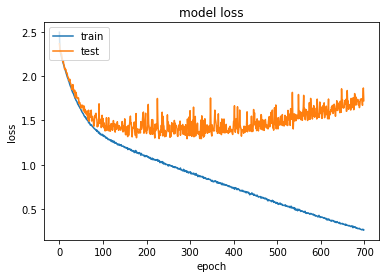

In [120]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [121]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Asus\Desktop\Speech-Emotion-Analyzer-master\saved_models\Emotion_Voice_Detection_Model.h5 


In [122]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [123]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 49.74%


## Predicting emotions on the test data

In [124]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

191/191 [==============================] - 0s 919us/step


In [125]:
preds

array([[2.2174934e-05, 4.5828321e-07, 2.7797434e-08, ..., 2.2258033e-01,
        9.7876392e-02, 6.7925555e-01],
       [2.6390902e-04, 9.4495663e-06, 5.0335410e-07, ..., 8.3943140e-03,
        8.8799310e-01, 9.5112108e-02],
       [9.9387383e-01, 6.7155539e-09, 4.1633375e-05, ..., 2.7018520e-03,
        4.7054421e-04, 1.1035781e-06],
       ...,
       [1.2525517e-02, 1.2690725e-02, 6.7000406e-07, ..., 7.5417277e-03,
        1.4071709e-01, 2.6992944e-01],
       [5.4089921e-03, 4.1844469e-05, 7.4327581e-08, ..., 5.4670191e-01,
        2.9145935e-04, 3.7142698e-02],
       [3.5480042e-03, 6.3453818e-08, 1.8540784e-09, ..., 1.4566988e-02,
        3.9836505e-01, 2.0116144e-03]], dtype=float32)

In [126]:
preds1=preds.argmax(axis=1)

In [127]:
preds1

array([9, 8, 0, 0, 0, 0, 4, 3, 8, 7, 6, 1, 0, 0, 3, 0, 0, 8, 8, 5, 3, 8,
       0, 3, 5, 9, 8, 4, 0, 2, 5, 5, 3, 8, 0, 5, 3, 3, 0, 2, 5, 0, 7, 0,
       3, 0, 1, 6, 5, 1, 8, 1, 1, 5, 0, 0, 5, 3, 3, 8, 9, 2, 2, 0, 9, 0,
       8, 2, 0, 1, 8, 4, 3, 8, 0, 8, 5, 6, 9, 0, 1, 9, 2, 7, 1, 8, 8, 3,
       8, 7, 6, 9, 9, 0, 5, 3, 5, 9, 6, 9, 8, 0, 5, 2, 0, 6, 8, 4, 1, 9,
       9, 1, 8, 3, 0, 4, 2, 6, 5, 2, 3, 4, 4, 1, 0, 6, 8, 0, 6, 8, 1, 7,
       5, 3, 1, 5, 0, 9, 5, 5, 3, 8, 9, 6, 6, 8, 5, 3, 1, 8, 0, 0, 0, 6,
       6, 8, 5, 2, 6, 1, 5, 3, 4, 0, 7, 5, 1, 5, 3, 0, 0, 8, 7, 1, 5, 8,
       8, 4, 4, 1, 5, 6, 9, 9, 0, 8, 8, 5, 6, 7, 5], dtype=int64)

In [128]:
abc = preds1.astype(int).flatten()

In [129]:
predictions = (lb.inverse_transform((abc)))

In [130]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_sad
1,male_happy
2,female_angry
3,female_angry
4,female_angry
5,female_angry
6,female_sad
7,female_happy
8,male_happy
9,male_fearful


In [131]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [132]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_fearful
1,male_happy
2,female_angry
3,female_angry
4,female_calm
5,female_angry
6,female_sad
7,female_happy
8,male_happy
9,male_angry


In [133]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [134]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_angry,female_angry
171,male_happy,male_happy
172,male_fearful,male_fearful
173,female_calm,female_calm
174,male_fearful,male_angry
175,male_sad,male_happy
176,male_sad,male_happy
177,female_sad,female_sad
178,female_calm,female_sad
179,female_happy,female_calm


In [135]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,19
female_calm,16
female_fearful,16
female_happy,16
female_sad,15
male_angry,27
male_calm,25
male_fearful,19
male_happy,26


In [136]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,36
female_calm,18
female_fearful,10
female_happy,20
female_sad,10
male_angry,27
male_calm,16
male_fearful,8
male_happy,30


In [137]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

In [138]:
# get the file through api (listening on a specific port)

In [139]:
data, sampling_rate = librosa.load('output10.wav')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


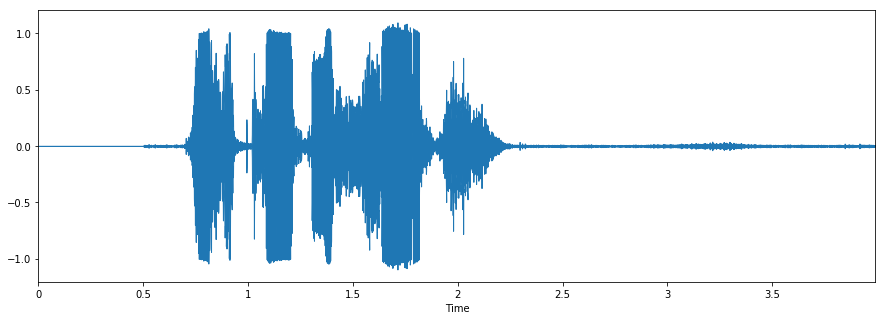

In [140]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [141]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [142]:
livedf2= pd.DataFrame(data=livedf2)

In [143]:
livedf2 = livedf2.stack().to_frame().T

In [144]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-18.203564,-21.471836,-22.52221,-21.712259,-22.264288,-20.707904,-21.726444,-21.76865,-24.302736,-22.250634,...,-24.273819,-24.639939,-24.929152,-24.43919,-25.210171,-24.740646,-22.311913,-22.579805,-22.31466,-21.552436


In [145]:
twodim= np.expand_dims(livedf2, axis=2)

In [146]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 2ms/step


In [147]:
livepreds

array([[2.5782271e-03, 3.2926897e-17, 1.0200868e-08, 3.1145240e-07,
        1.4192071e-10, 3.2506030e-04, 4.5771236e-07, 9.9709177e-01,
        9.9374722e-07, 3.2106709e-06]], dtype=float32)

In [148]:
livepreds1=livepreds.argmax(axis=1)

In [149]:
liveabc = livepreds1.astype(int).flatten()

In [150]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_fearful'], dtype=object)

In [ ]:
#api response 